In [ ]:
install.packages("dplyr")
library(dplyr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [ ]:
install.packages("ggplot2")
library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
data=read.csv("/content/apy.csv")

head(data)

duplicated_rows <- duplicated(data)
clean_data <- data[!duplicated_rows, ]
#print(clean_data)
ncol(data)
nrow(data)
nrow(clean_data)


,State,District,Crop,Crop_Year,Season,Area,Production,Yield
,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>,<int>,<dbl>
1,Andaman and Nicobar Island,NICOBARS,Arecanut,2007,Kharif,2439.6,3415,1.40
2,Andaman and Nicobar Island,NICOBARS,Arecanut,2007,Rabi,1626.4,2277,1.40
3,Andaman and Nicobar Island,NICOBARS,Arecanut,2008,Autumn,4147.0,3060,0.74
4,Andaman and Nicobar Island,NICOBARS,Arecanut,2008,Summer,4147.0,2660,0.64
5,Andaman and Nicobar Island,NICOBARS,Arecanut,2009,Autumn,4153.0,3120,0.75
6,Andaman and Nicobar Island,NICOBARS,Arecanut,2009,Summer,4153.0,2080,0.50


[1] 8

[1] 345336

[1] 345336

In [ ]:
data1 <- na.omit(clean_data)
nrow(data1)

[1] 340388

In [ ]:
# Find rows with NA values
nrow(which(is.na(data),arr.ind=TRUE))


[1] 4948

In [ ]:
# Remove Space from data frame
df <- data.frame(lapply(data1, trimws))
unique(df$Season)
colnames(df)



[1] "Kharif"     "Rabi"       "Autumn"     "Summer"     "Whole Year"
[6] "Winter"

[1] "State"      "District"   "Crop"       "Crop_Year"  "Season"    
[6] "Area"       "Production" "Yield"

In [ ]:
# #◼ Find the state which has more production during Rabi season for all years
rabi_season <- subset(df,Season	== 'Rabi')
rabi_season$Production <- as.integer(rabi_season$Production)
grouped_data <- rabi_season %>% group_by(State) %>% summarise(total_Production = sum(Production, na.rm = TRUE)) %>% arrange(desc(total_Production)) %>% slice(1)
print(grouped_data$State)


[1] "Uttar Pradesh"


In [ ]:
###◼ Find the district which has more yield during Kharif for all years
kharif_season <- subset(df , Season =='Kharif')
kharif_season$Yield <- as.integer(kharif_season$Yield)
grouped_data1 <- kharif_season %>% group_by(District) %>% summarise(total_Yield = sum(Yield, na.rm = TRUE)) %>% arrange(desc(total_Yield)) %>% slice(1)
print(grouped_data1$District)


[1] "SRIKAKULAM"


In [ ]:
##◼ Find the draught year from this data
df$Production <- as.numeric(df$Production)
draught_year <- df %>% group_by(Crop_Year) %>% summarise(total_Production = sum(Production)) %>% arrange(desc(total_Production))# %>% slice(-1)
draught_year1 <- slice(draught_year,-1)
print(draught_year1$Crop_Year)

 [1] "2015" "2019" "2018" "2014" "2013" "2009" "2016" "2008" "2017" "2006"
[11] "2005" "2007" "2004" "2012" "2002" "2003" "2010" "2000" "2001" "1999"
[21] "1998" "1997" "2020"


In [ ]:
##◼ Find the state which produces more rice and more sugarcane
df_rs <- subset(df,Crop == "Rice" | Crop == "Sugarcane")
df_rs$Production <- as.numeric(df_rs$Production)
grouped_data2 <- df_rs %>% group_by(State) %>% summarise(total_Production = sum(Production, na.rm = TRUE)) %>% arrange(desc(total_Production)) %>% slice(1)
print(grouped_data2$State)



[1] "Uttar Pradesh"


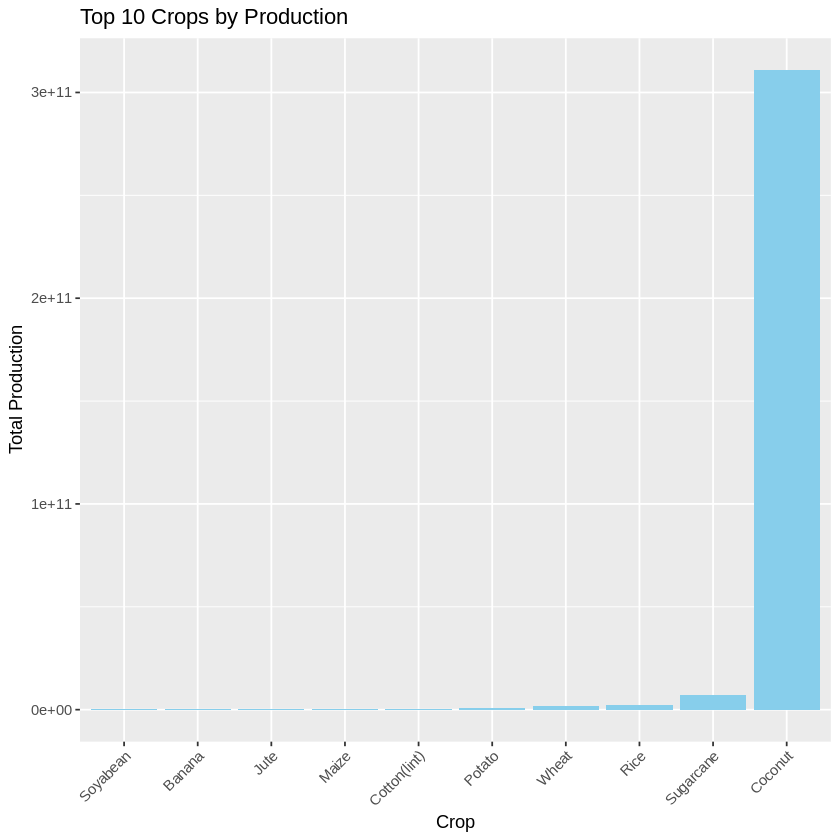

In [ ]:
#### problem 1
#### Analysis of crop whose production is more
df$Production <- as.numeric(df$Production)
# Calculate total production of each crop
crop_production <- df %>% group_by(Crop) %>% summarize(total_production = sum(Production)) %>% arrange(desc(total_production))  # Arrange in descending order of production

# Number of top crops to visualize
top_n <- 10

# Select top N crops
top_crops <- crop_production[1:top_n, ]

# Create a bar plot to visualize the production of top N crops
ggplot(top_crops, aes(x = reorder(Crop, total_production), y = total_production)) +geom_bar(stat = "identity", fill = "skyblue") +labs(title = paste("Top", top_n, "Crops by Production"), x = "Crop", y = "Total Production") +theme(axis.text.x = element_text(angle = 45, hjust = 1))


In [ ]:
## PROBLEM 2
### Most produced crop in a particular state
state_name <- readline("Enter the name of state:")
df_subset <- subset(df , State==state_name)
group_crop_tp <- df_subset %>% group_by(Crop) %>% summarise(total_Production=sum(Production)) %>% arrange(desc(total_Production))
print(group_crop_tp)
#print("Maximum Produced crop in",state_name,"is:",head(group_crop_tp$Crop,n=1))
head(group_crop_tp$Crop,n=1)

Enter the name of state:Haryana
# A tibble: 35 × 2
   Crop              total_Production
   <chr>                        <dbl>
 1 Wheat                    241279000
 2 Sugarcane                168260900
 3 Rice                      80531900
 4 Cotton(lint)              38368100
 5 Bajra                     19301200
 6 Rapeseed &Mustard         17622900
 7 Potato                     9483725
 8 Onion                      5550065
 9 Barley                     2429200
10 Gram                       2065590
# ℹ 25 more rows


[1] "Wheat"

# A tibble: 24 × 2
   Crop_Year total_Production
       <int>            <dbl>
 1      2011      19398368199
 2      2015      18491148114
 3      2019      18425295133
 4      2018      18065823475
 5      2014      17889904178
 6      2013      17201760746
 7      2009      16708231546
 8      2016      16525944107
 9      2008      16272912237
10      2017      16032489724
# ℹ 14 more rows


[1] 2011 2015 2019 2018 2014 2013 2009 2016 2008 2017 2006 2005 2007 2004 2012
[16] 2002 2003 2010 2000 2001 1999 1998 1997 2020

Warning message:
“In subset.data.frame(group_y_tp, Crop_Year = 2020) :
 extra argument ‘Crop_Year’ will be disregarded”


# A tibble: 24 × 2
   Crop_Year total_Production
       <int>            <dbl>
 1      2011      19398368199
 2      2015      18491148114
 3      2019      18425295133
 4      2018      18065823475
 5      2014      17889904178
 6      2013      17201760746
 7      2009      16708231546
 8      2016      16525944107
 9      2008      16272912237
10      2017      16032489724
# ℹ 14 more rows


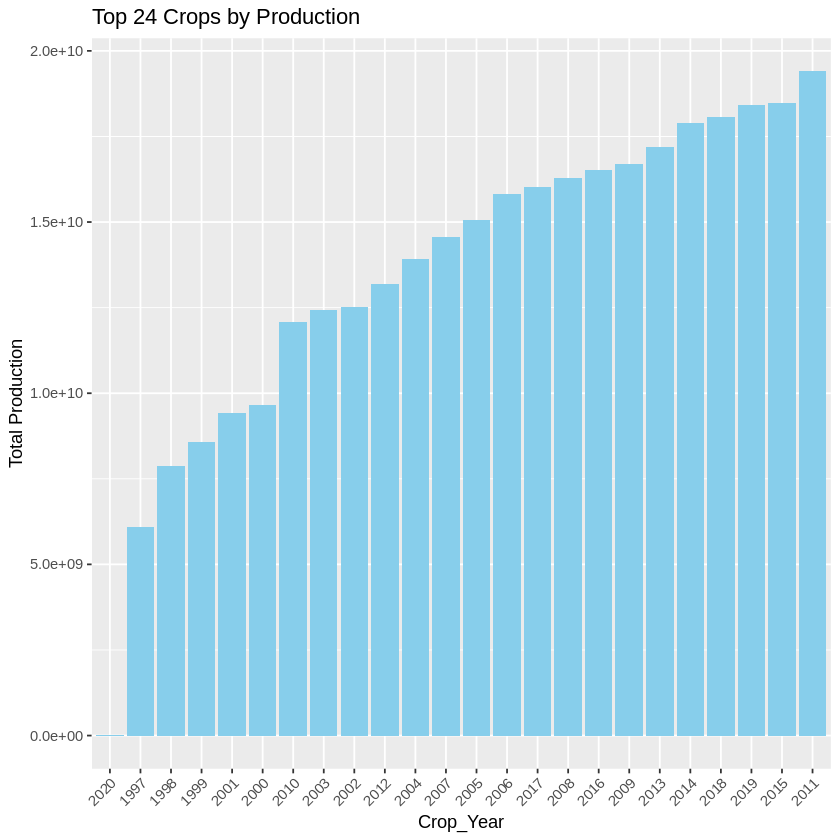

In [ ]:
### Problem 3  In which year Production is highest
df$Crop_Year = as.integer(df$Crop_Year)
## top n Years in which production is more
group_y_tp <- df %>% group_by(Crop_Year) %>% summarise(total_Production = sum(Production)) %>% arrange(desc(total_Production))
print(group_y_tp)
group_y_tp$Crop_Year
top_n <- 24
top_year <- group_y_tp[1:top_n,]
ggplot(top_year, aes(x = reorder(Crop_Year, total_Production), y = total_Production)) +geom_bar(stat = "identity", fill = "skyblue") +
  labs(title = paste("Top", top_n, "Crops by Production"), x = "Crop_Year", y = "Total Production") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


#### YIELD ANALYSIS ######

In [ ]:
### PROBLEM 4 ### Crop Suitability Across Different States
### Average yield of each crop in different State
# Group data by crop and state, and calculate average yield
df$Yield <- as.numeric(df$Yield)
average_Yield <- df %>% group_by(Crop, State) %>% summarise(average_yield = mean(Yield)) %>% ungroup()
print(average_Yield)
# Set the width and height of the plotting window
options(repr.plot.width = 20, repr.plot.height = 10)
# # Plot the average yield of each crop over the states as a bar plot
ggplot(average_Yield, aes(x = State, y = average_yield, fill = Crop)) +geom_bar(stat = "identity") +
  labs(title = "Yield Performance of Different Crops Over the State",x = "State",y = "Average Yield",fill = "Crop") +theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


`summarise()` has grouped output by 'Crop'. You can override using the
`.groups` argument.


# A tibble: 1,116 × 3
   Crop       State                      average_yield
   <chr>      <chr>                              <dbl>
 1 ""         Tamil Nadu                         0.126
 2 "Arecanut" Andaman and Nicobar Island         1.75 
 3 "Arecanut" Andhra Pradesh                     2.17 
 4 "Arecanut" Assam                              0.899
 5 "Arecanut" Goa                                1.68 
 6 "Arecanut" Karnataka                          6.72 
 7 "Arecanut" Kerala                             0.888
 8 "Arecanut" Meghalaya                          1.27 
 9 "Arecanut" Puducherry                         1.44 
10 "Arecanut" Tamil Nadu                         1.77 
# ℹ 1,106 more rows


ERROR: Error in ggplot(average_Yield, aes(x = State, y = average_yield, fill = Crop)): could not find function "ggplot"


In [ ]:
# Define the specific crop for analysis
specific_crop <- readline("Enter the name of desired Crop:")

# Group data by region and crop, and calculate average yield
average_Yield <- df %>% filter(Crop == specific_crop) %>% group_by(State) %>% summarize(average_yield = mean(Yield, na.rm = TRUE)) %>% ungroup()

# Identify regions with high and low yields
high_yield_region <- average_Yield %>% filter(average_yield == max(average_Yield$average_yield))

low_yield_region <- average_Yield %>% filter(average_yield == min(average_Yield$average_yield))

# Display the results
cat("Region with highest average yield for", specific_crop, ":", high_yield_region$State, "\n")
cat("Region with lowest average yield for", specific_crop, ":", low_yield_region$State, "\n")

Enter the name of desired Crop:Wheat
Region with highest average yield for Wheat : CHANDIGARH 
Region with lowest average yield for Wheat : Andhra Pradesh 


###### SEASONAL ANALYSIS ########

`summarise()` has grouped output by 'Crop'. You can override using the
`.groups` argument.


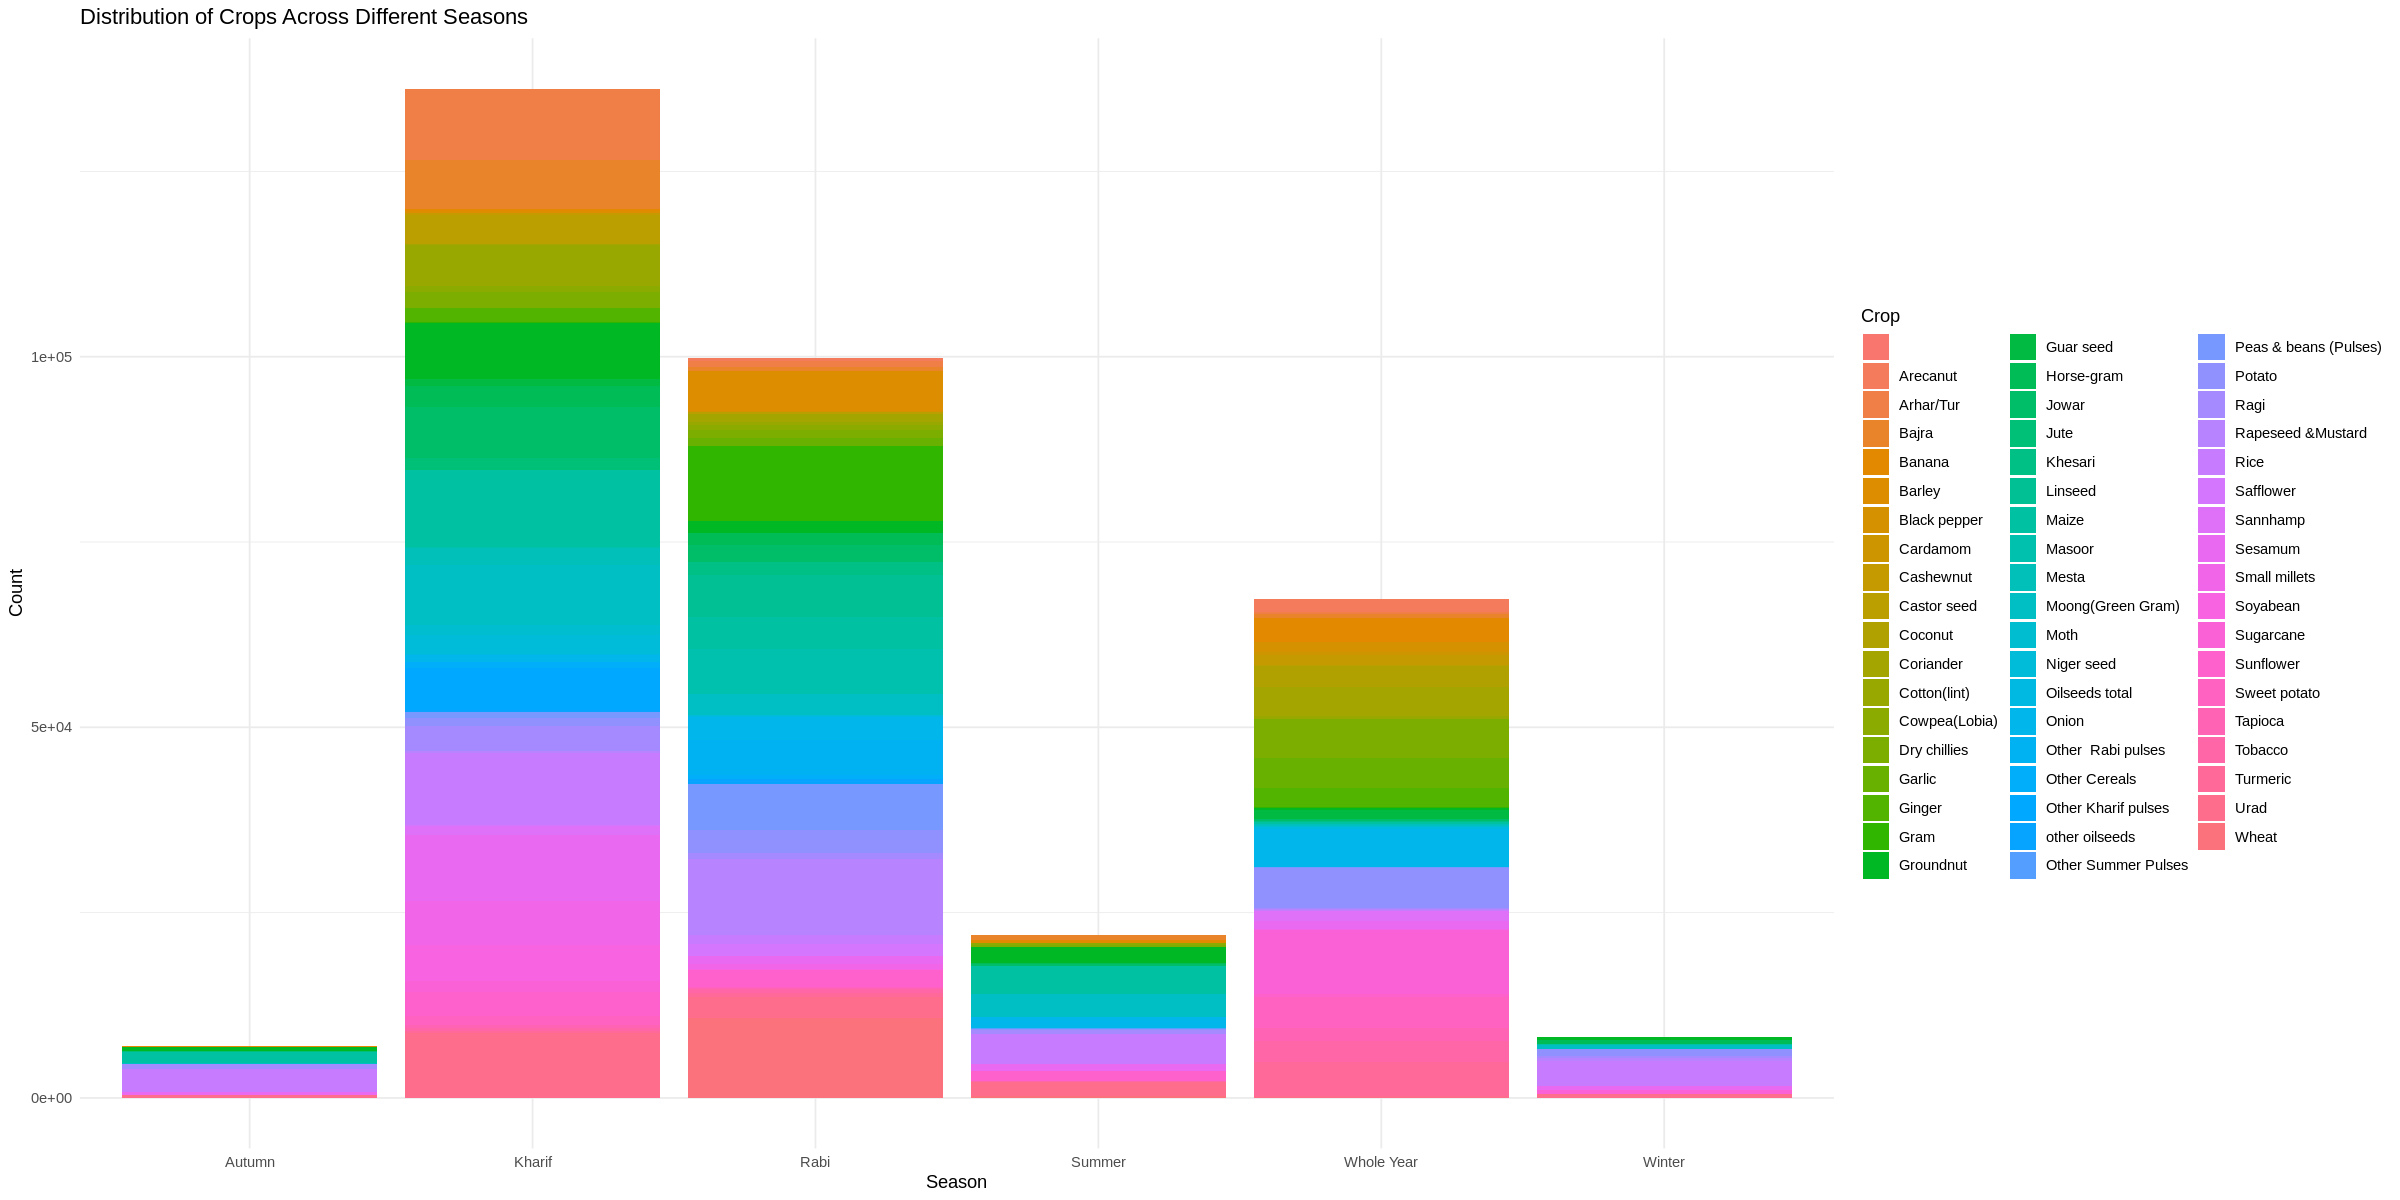

In [ ]:
## PROBLEM 5 ## distribution of crops across different seasons
# Group data by crop and season, and count occurrences
crop_counts <- df %>% group_by(Crop, Season) %>% summarise(count = n()) %>% ungroup()
# Set the width and height of the plotting window
options(repr.plot.width = 20, repr.plot.height = 10)
# Plot the distribution of crops across different seasons as a bar plot
ggplot(crop_counts, aes(x = Season, y = count, fill = Crop)) + geom_bar(stat = "identity") + labs(title = "Distribution of Crops Across Different Seasons",
       x = "Season", y = "Count", fill = "Crop") + theme_minimal()

In [ ]:
# Group data by crop, state, and season, and calculate average yield
df$Yield <- as.numeric(df$Yield)
crop_season_avg_yield <- df %>% group_by(Crop, State, Season) %>% summarise(avg_yield = mean(Yield), .groups = "drop")

# Find the season with the highest average yield for each crop in each state
favorable_season <- crop_season_avg_yield %>%
  group_by(Crop, State) %>%
  slice(which.max(avg_yield))

# View the resulting data frame
print(favorable_season)


# A tibble: 279 × 4
# Groups:   Crop, State [279]
   Crop      State                      Season        avg_yield
   <chr>     <chr>                      <chr>             <dbl>
 1 Arecanut  Andaman and Nicobar Island "Rabi       "     2.04 
 2 Arecanut  Andhra Pradesh             "Kharif     "     3.92 
 3 Arecanut  Assam                      "Rabi       "     0.922
 4 Arecanut  Goa                        "Whole Year "     1.68 
 5 Arhar/Tur Andaman and Nicobar Island "Rabi       "     1.02 
 6 Arhar/Tur Andhra Pradesh             "Rabi       "     0.486
 7 Arhar/Tur Arunachal Pradesh          "Kharif     "     0.820
 8 Arhar/Tur Assam                      "Kharif     "     0.770
 9 Arhar/Tur Bihar                      "Kharif     "     1.45 
10 Arhar/Tur CHANDIGARH                 "Kharif     "     0.667
# ℹ 269 more rows


Warning message:
“In subset.data.frame(favorable_season, Season = "Rabi") :
 extra argument ‘Season’ will be disregarded”


In [ ]:
##◼ Assume that you are employed as a crop insurance agent,which crop will you recommend for insurance, why?
# Calculate average production
average_production <- df %>% group_by(State, Crop) %>% summarise(average_production = mean(Production))

# Assign threshold production
threshold_production <- 1000  # Example threshold production level

# Filter crops based on criteria
recommended_crops <- average_production %>% filter(average_production > threshold_production)

# View recommended crops
print(recommended_crops)


`summarise()` has grouped output by 'State'. You can override using the
`.groups` argument.


# A tibble: 519 × 3
# Groups:   State [37]
   State                      Crop         average_production
   <chr>                      <chr>                     <dbl>
 1 Andaman and Nicobar Island Arecanut                  3102.
 2 Andaman and Nicobar Island Banana                    5828.
 3 Andaman and Nicobar Island Coconut               42756458.
 4 Andaman and Nicobar Island Rice                      8570.
 5 Andaman and Nicobar Island Sugarcane                 1342.
 6 Andhra Pradesh             Arhar/Tur                 5827.
 7 Andhra Pradesh             Bajra                     3282.
 8 Andhra Pradesh             Banana                  130335.
 9 Andhra Pradesh             Black pepper              4412 
10 Andhra Pradesh             Cashewnut                 3632.
# ℹ 509 more rows


◼ Suppose, you can travel back and land in a particular year
what would be your recommendation to farmers to
produce a particular crop for that particular year?

In [ ]:
## creating a function
recommend_crop <- function(df, year1,state) {
   data_ys <- subset(df , Crop_Year == year1 & State == state)
   data_ys$Yield <- as.numeric(data_ys$Yield)
   top_crop <- data_ys %>% group_by(Crop) %>% summarise(Average_Yield = mean(Yield, na.rm = TRUE)) %>% arrange(desc(Average_Yield)) %>%slice(1)
   return(top_crop$Crop)
}

In [ ]:

year <- readline("enter the year :")
year <- as.numeric(year)
year1 <- year-1
state <- readline("Enter the state name :")
recommended_crop <- recommend_crop(df,year1,state)
print(recommended_crop)


enter the year :2012
Enter the state name :Haryana
[1] "Potato"


In [ ]:
###◼ Create a piece of software to get the following input and provide the analysis of yields for the entire nation
#◼ Year
#◼ Season
#◼ Crop
#◼ Production
year <- as.integer(readline("Enter year: "))
crop <- readline("Enter crop: ")
season <- readline("Enter season ['Rabi', 'Kharif', 'Summer', 'Whole Year', 'Autumn']: ")

# Subset dataframe based on user input
yields <- df[df$Crop == crop & df$Season == season & df$Crop_Year == year, ]

# Print top five states in yield
cat("\nTop five states in Yield corresponding to given data:\n")
print(head(yields[order(-yields$Yield), ], 5))

# Print least five states in yield
cat("\nLeast five states in Yield corresponding to given data:\n")
print(tail(yields[order(yields$Yield), ], 5))

# Summary statistics for the subset
print(summary(yields))


Enter year: 2005
Enter crop: Wheat
Enter season ['Rabi', 'Kharif', 'Summer', 'Whole Year', 'Autumn']: Rabi

Top five states in Yield corresponding to given data:
            State    District  Crop Crop_Year Season   Area Production Yield
230204     Punjab    LUDHIANA Wheat      2005   Rabi 257000    1228000  4.78
64201  CHANDIGARH  CHANDIGARH Wheat      2005   Rabi    600       2750  4.58
100340    Haryana KURUKSHETRA Wheat      2005   Rabi 109187     499000  4.57
230158     Punjab   JALANDHAR Wheat      2005   Rabi 170000     764000  4.49
229976     Punjab    AMRITSAR Wheat      2005   Rabi 371000    1643000  4.43

Least five states in Yield corresponding to given data:
            State    District  Crop Crop_Year Season   Area Production Yield
229976     Punjab    AMRITSAR Wheat      2005   Rabi 371000    1643000  4.43
230158     Punjab   JALANDHAR Wheat      2005   Rabi 170000     764000  4.49
100340    Haryana KURUKSHETRA Wheat      2005   Rabi 109187     499000  4.57
64201  CHAN

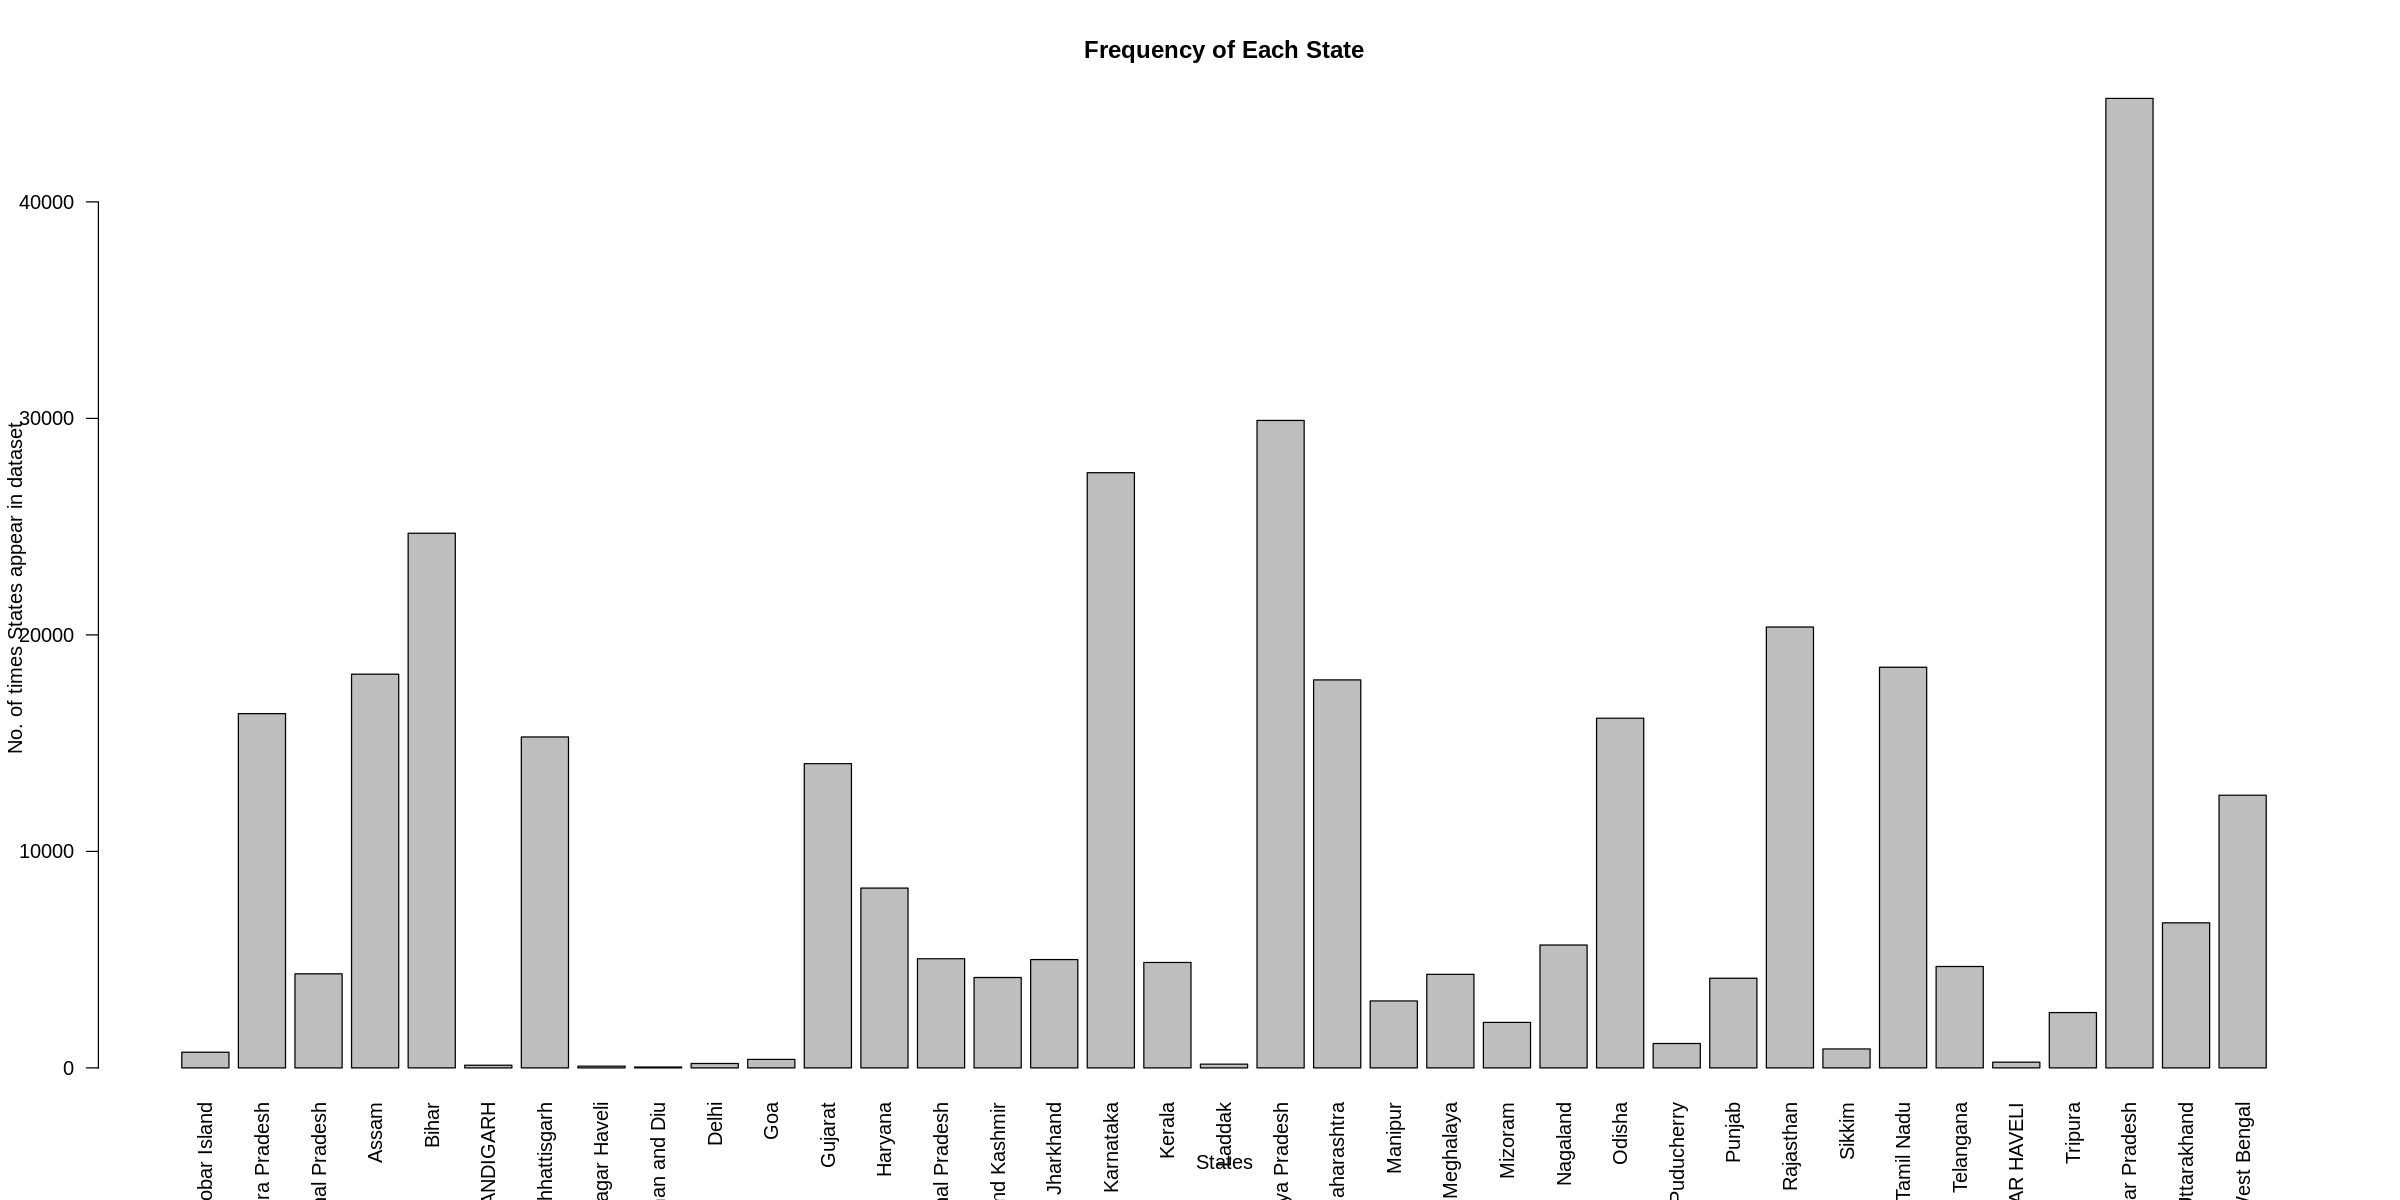

In [ ]:
##◼ Provide a categorical data analysis
# Load necessary library
library(dplyr)

# Load dataset
df <- read.csv('/content/apy.csv')

# Convert necessary columns to factors
df$State <- as.factor(df$State)
df$District <- as.factor(df$District)
df$Crop <- as.factor(df$Crop)
df$Crop_Year <- as.factor(df$Crop_Year)
df$Season <- as.factor(df$Season)

# Basic analysis
unique_states <- nlevels(df$State)  # Count of unique states
unique_districts <- nlevels(df$District)  # Count of unique districts
unique_crops <- nlevels(df$Crop)  # Count of unique crops
unique_crop_years <- nlevels(df$Crop_Year)  # Count of unique crop years
unique_seasons <- nlevels(df$Season)  # Count of unique seasons

# Frequency distribution
crop_frequency_distribution <- table(df$Crop)  # Frequency distribution of crops
season_frequency_distribution <- table(df$Season)  # Frequency distribution of seasons

# Cross-tabulation
cross_tab_crop_season <- table(df$Crop, df$Season)  # Crosstab of crop and season

# Grouping and Aggregation
average_yield_by_crop <- df %>% group_by(Crop) %>% summarize(mean_yield = mean(Yield))  # Average yield by crop
# Set the width and height of the plotting window
options(repr.plot.width = 20, repr.plot.height = 10)
# Visualization
# Frequency of Each State - Bar Plot
barplot(table(df$State),
        main = "Frequency of Each State",
        xlab = "States",
        ylab = "No. of times States appear in dataset",
        las = 2)  # Rotate x-axis labels vertically


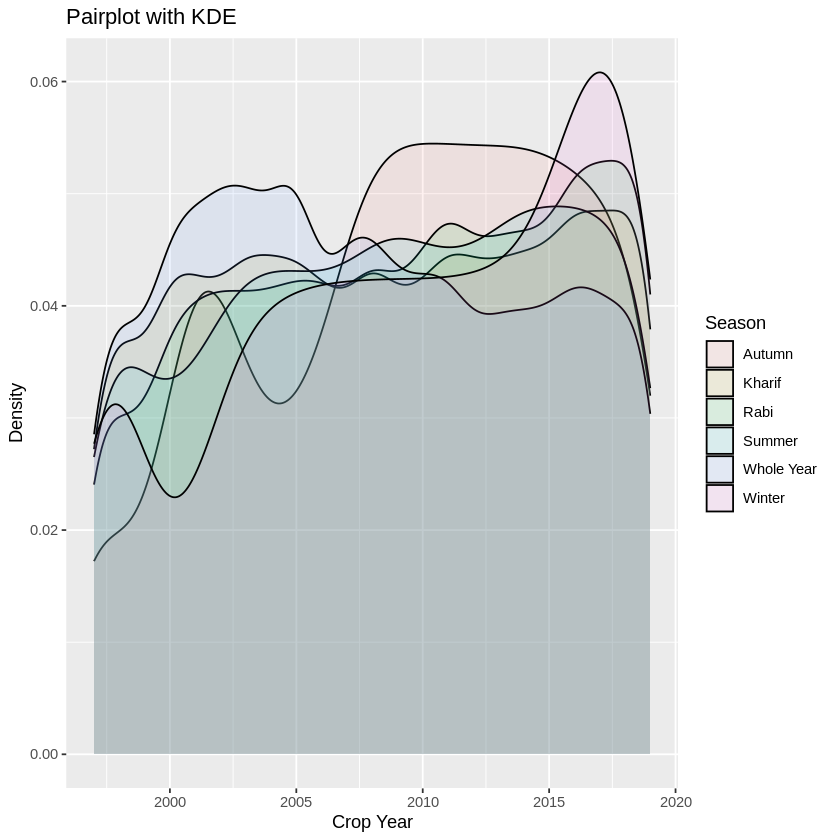

In [ ]:
###◼ Provide a pairplot using kde
# Load necessary library
library(ggplot2)

# Load dataset
df <- read.csv("/content/apy.csv")
data <- na.omit(df)

# Create pair plot with kernel density estimates
ggplot(data, aes(x = Crop_Year, fill = Season)) +
  geom_density(alpha = 0.1) +
  labs(title = "Pairplot with KDE", x = "Crop Year", y = "Density")
